In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# بارگذاری دیتاست
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# حذف ستون 'customerID' چون برای مدل مفهومی نداره
df = df.drop(columns=['customerID'])

# تبدیل داده‌های متنی به عددی با استفاده از LabelEncoder
label_encoder = LabelEncoder()

# ستون‌های دسته‌ای که باید به عددی تبدیل شوند
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# اعمال LabelEncoder برای هر ستون دسته‌ای
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# تبدیل ستون 'TotalCharges' به عددی و مدیریت مقادیر گمشده
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# ویژگی‌ها (X) و هدف (y)
X = df.drop(columns=['Churn'])  # ویژگی‌ها (تمام ستون‌ها به جز 'Churn')
y = df['Churn']  # هدف (چیزی که می‌خواهیم پیش‌بینی کنیم)

# استانداردسازی داده‌ها (قبل از تقسیم داده‌ها)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسیم داده‌ها به داده‌های آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# مدل‌ها مختلف
log_reg = LogisticRegression(max_iter=2000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# آموزش مدل‌ها
log_reg.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# پیش‌بینی نتایج
log_reg_preds = log_reg.predict(X_test)
rf_preds = rf_model.predict(X_test)

# ارزیابی مدل‌ها
log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

# چاپ گزارش کامل ارزیابی مدل‌ها
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_preds))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))


Logistic Regression Accuracy: 0.8161816891412349
Random Forest Accuracy: 0.7955997161107168
Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1036
         Yes       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



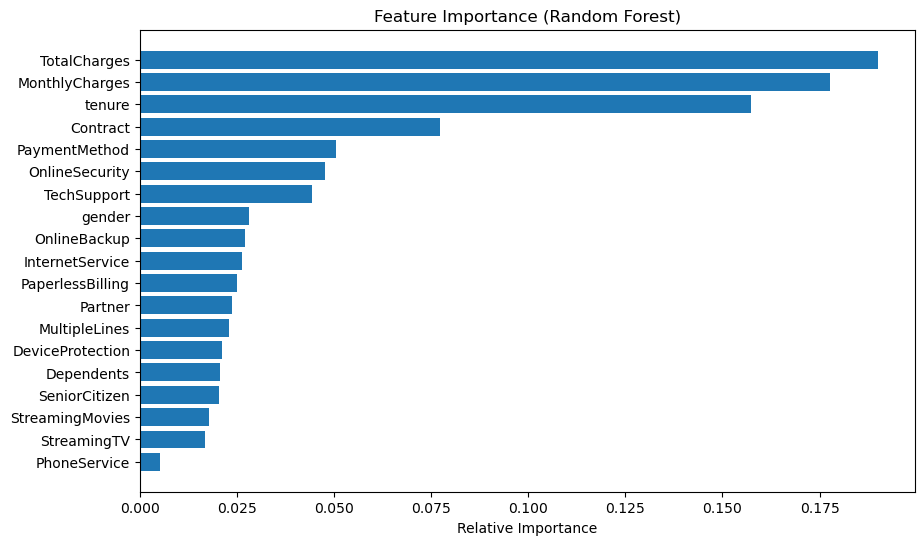

In [26]:
import matplotlib.pyplot as plt

# استخراج اهمیت ویژگی‌ها از مدل جنگل تصادفی
importances = rf_model.feature_importances_

# مرتب‌سازی ویژگی‌ها بر اساس اهمیت
indices = importances.argsort()

# رسم نمودار اهمیت ویژگی‌ها
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
